# import libs 


In [143]:
import numpy as np
import pandas as pd 
import  matplotlib.pyplot as plt

# read csv file from  path and nameing columns 

In [144]:
# r  if for sikp escape sequences  like \n \t in path  
path=r"ML.csv"
data=pd.read_csv(path,header=None,names=["population","profit"])
#print head to see our data 
data.head(10)


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [145]:
#here we make describe all summary stat in data
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<AxesSubplot:xlabel='population', ylabel='profit'>

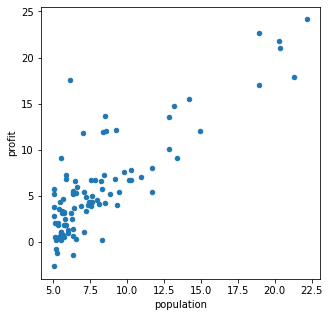

In [146]:
#plot by pandas 
data.plot(kind="scatter",x="population",y="profit",figsize =(5,5))


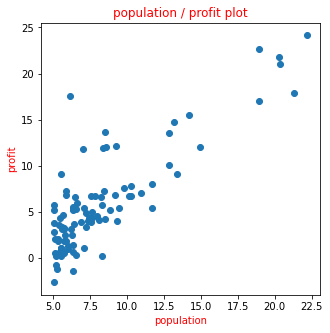

In [147]:
#anther way to plot 
# plotting with matplotlib 
plt.figure(figsize=(5,5))
plt.xlabel('population',color="r")
plt.ylabel('profit',color="r")
plt.title('population / profit plot',color="r")
plt.scatter(data["population"],data["profit"])


In [148]:
data.insert(0,"ones",1)

In [149]:
data.head(10)

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233
5,1,8.3829,11.8860
6,1,7.4764,4.3483
7,1,8.5781,12.0000
8,1,6.4862,6.5987
9,1,5.0546,3.8166


# sperate  training   data ( ones and x ) from y out put value

In [150]:
cols=data.shape[1] #shape is 97 *3 we here control in 3 columns cols = 3 if u print it 

x= data.iloc[:,0:cols-1] # here we get all row and first 2 columns 
y= data.iloc[:,cols-1:cols]# here we gat all row and third column


In [151]:
#here we convert dataframe to control it 
x=np.matrix(x.values)
y=np.matrix(y.values)
# print(x,y)
#make theta defualt value  theta0  an theta1 (0,0)
theta=np.array([[0,0]])
print(theta.shape,x.shape,y.shape)

(1, 2) (97, 2) (97, 1)


# cost function h(x)=theta0+theta1*x                                                                           j(O,O)=(1/2m)({h(x)-y)^2}

In [152]:
#as weknow we add 1 colum to get 0+0x for all row  h(x) now we make tanspose to theta to multiply it to x array and get h(x) for all row 
def computcost(x,y,theta):
    h=(x*theta.T) #for all row h(x) pridicted value 
    z=np.power(h-y,2)# here we makr part of cost function its h(x)- actual value and get power of all value 
    return np.sum(z)/(2*len(x)) # and here we get summation and divided it in number of row as cost function 
    
    

In [153]:
computcost(x,y,theta)

32.072733877455676

In [154]:
#gradient descent 
def gradient_bescent(x,y,theta,itry,alpha):
       #here we get new theta after n of try 
       temp=np.matrix(np.zeros(theta.shape))
       #number of parameters and number of theta in equation
       parameters=int(theta.shape[1])
       #number of try we loop it 
       cost=np.zeros(itry)
#        print(temp,"\n",parameters,"\n",cost,"\n")
       for itry in range(itry):
            #here we dete h(x) and subtraction y form it  for all data
            cost_erorr=(x*theta.T)-y
            for p in range(parameters):
                #here we make equation of gradient descent  here we multiply all cost function in xi of all columns in 
                term=np.multiply(cost_erorr,x[:,p])
                #here we get new theta form equation  and put it in temp and repeat all for number of try 
                temp[0,p]=theta[0,p]-((alpha/len(x))*(np.sum(term)))
            theta=temp
            #here we get value of cost function after every try and values of theta  
            cost[itry]=computcost(x,y,theta)
       #here we return best cost function and its values of thetas 
       return cost , theta    
                
                
       

In [155]:
itry=5000
cost,theta=gradient_bescent(x,y,theta,itry,.01)

# here we get best fit line for data (actaul  we get best costfunction for data)

In [156]:

x=np.linspace(data["population"].min(),data["population"].max(),100)
#after we get best theta0 and theta1 
# best cost function with best theta0 and theta1 H(x)
f=theta[0,0]+(theta[0,1]*x)

Text(0.5, 0, 'profit')

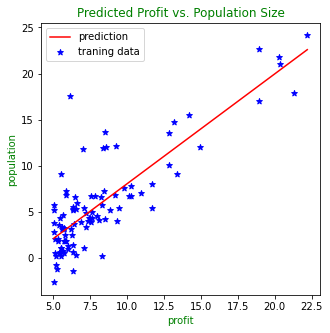

In [157]:
#drow best fit line with best thetas and best costfunction 
fg,ax=plt.subplots(figsize=(5,5))
ax.plot(x,f,"r",label="prediction")
ax.scatter(data["population"],data["profit"],color="b",label="traning data",marker="*")
ax.legend(loc=2)
ax.set_title("Predicted Profit vs. Population Size",color="g")
ax.set_ylabel("population",color="g")
ax.set_xlabel("profit",color="g")

# now we make graph cost and its number of  try 

Text(0.5, 1.0, 'number of try vs cost')

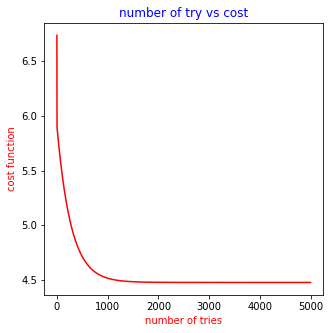

In [158]:
fg,ax=plt.subplots(figsize=(5,5))
ax.plot(np.arange(itry),cost,"r")
ax.set_xlabel("number of tries",color="r")
ax.set_ylabel("cost function",color="r")
ax.set_title("number of try vs cost",color="b")


In [ ]:
#after we see graph  of cost vs erorr function i think it 5000 it good and we get best fit line for it 